In [7]:
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Test MTCNN face detection model

In [6]:

class MTCNNFaceNetDetector:
    def __init__(self, device='cpu'):
        self.device = device
        
        # Face detector
        self.mtcnn = MTCNN(
            image_size=160, 
            margin=0, 
            min_face_size=20,
            device=device,
            select_largest=True  # Select largest face if multiple
        )
        
        # Face recognition model (embeddings)
        self.resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)
    
    def get_embedding(self, image_path):
        """Extract face embedding from image"""
        img = Image.open(image_path).convert('RGB')
        
        # Detect and crop face
        face = self.mtcnn(img)
        
        if face is None:
            return None
        
        # Get embedding
        with torch.no_grad():
            face = face.unsqueeze(0).to(self.device)
            embedding = self.resnet(face).cpu().numpy()[0]
        
        return embedding
    
    def compare_faces(self, embedding1, embedding2):
        """Compare two embeddings, return distance"""
        if embedding1 is None or embedding2 is None:
            return None
        
        # Euclidean distance
        distance = np.linalg.norm(embedding1 - embedding2)
        return distance

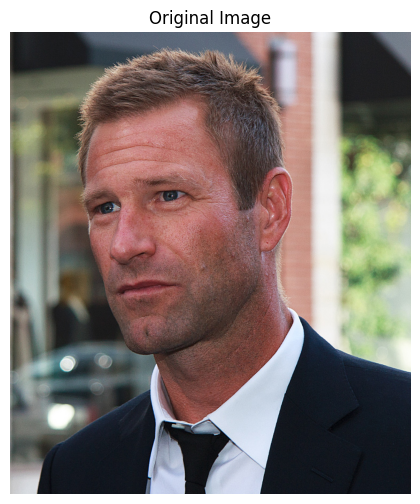

In [8]:
image_path = "/workspaces/face_duplicate_detection/data/images/Aaron Eckhart_1.jpg"
img = Image.open(image_path)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

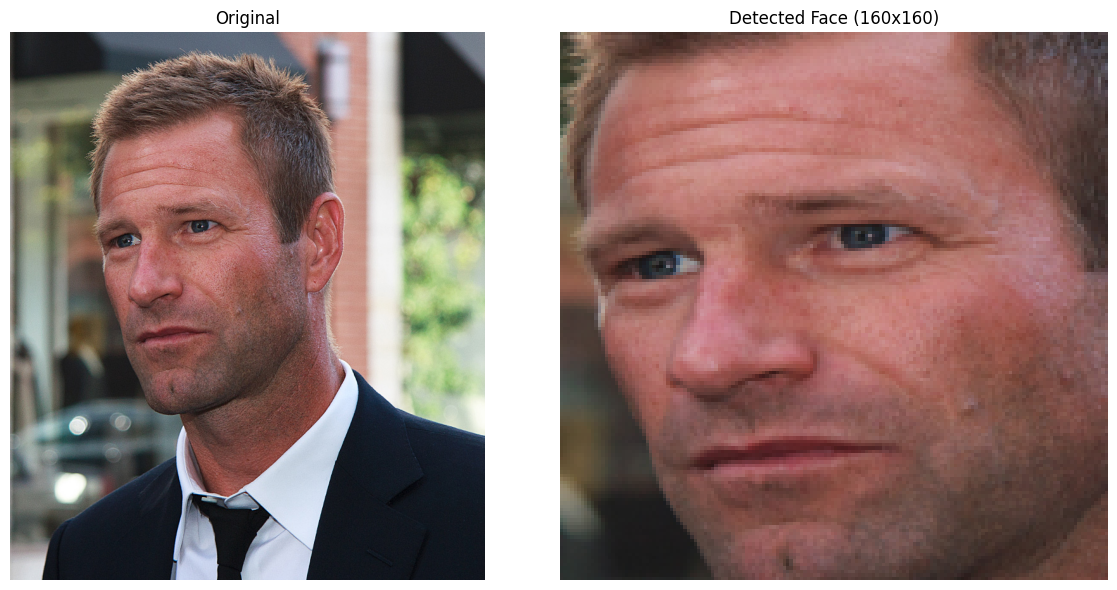

In [16]:
mtcnn = MTCNN(image_size=160, device='cpu')
face_tensor = mtcnn(img)

# Show side-by-side
if face_tensor is not None:
    face_img = face_tensor.permute(1, 2, 0).numpy()
    face_img = (face_img * 0.5) + 0.5
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(face_img)
    axes[1].set_title('Detected Face (160x160)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No face detected")

In [ ]:
# Usage
detector = MTCNNFaceNetDetector()

emb1 = detector.get_embedding('person1_photo1.jpg')
emb2 = detector.get_embedding('person1_photo2.jpg')

if emb1 is not None and emb2 is not None:
    distance = detector.compare_faces(emb1, emb2)
    print(f"Distance: {distance:.3f}")
    # Typical threshold: < 0.7 for same person